In [23]:
import math

import jax
import jax.numpy as jnp
from jax import grad, random, vmap

from utils import *
from kernels import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from scipy.ndimage import gaussian_filter

In [24]:
def apply_gaussian_smoothing(data, sigma=1, axes=-1):
    smoothed_data = gaussian_filter(np.array(data), sigma=sigma, axes=axes)
    return jnp.array(smoothed_data)

<Figure size 640x480 with 0 Axes>

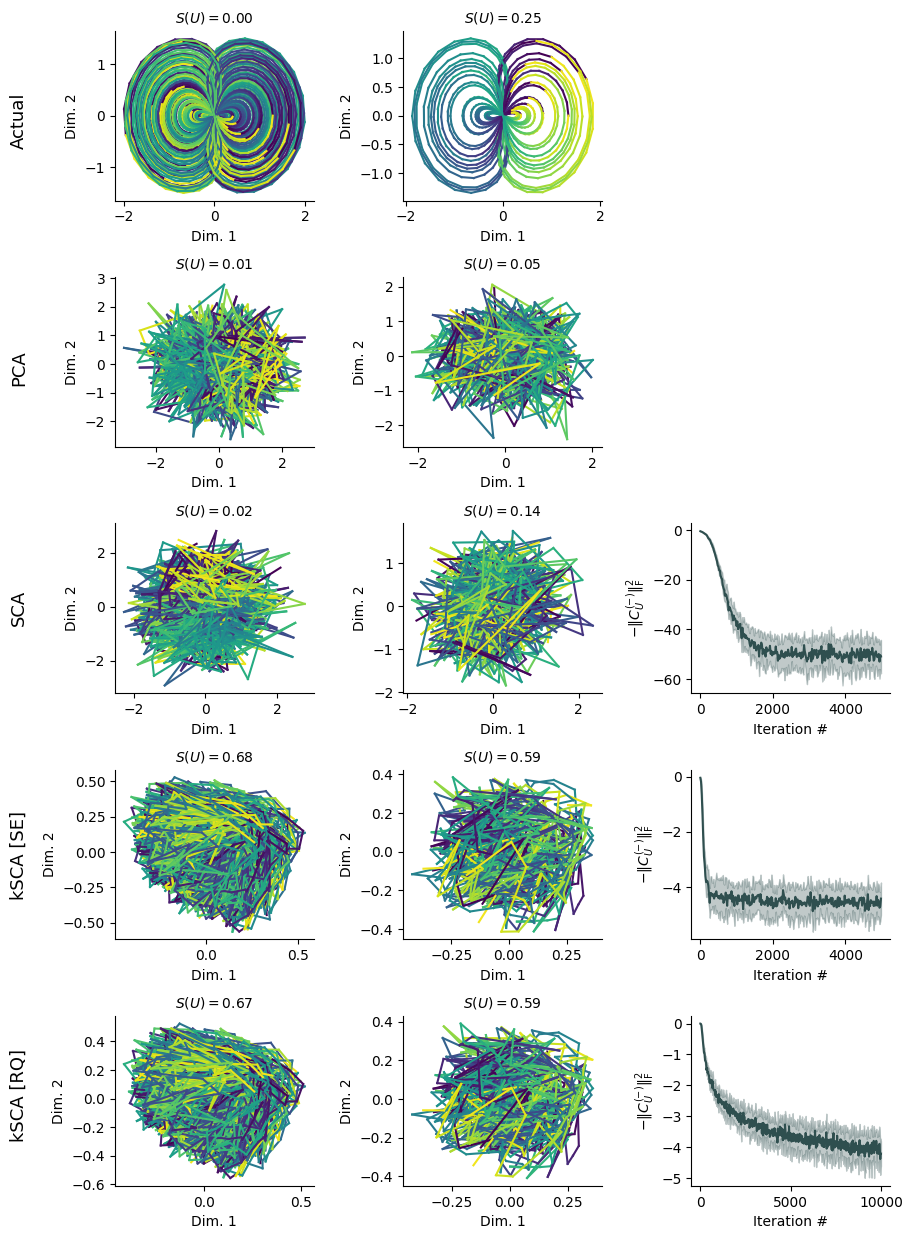

<Figure size 640x480 with 0 Axes>

In [32]:

main_path = '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy_datasets/toy_data'

gt_files_rotation_iso = [
    f'{main_path}/rotation_isotropic/X.npy',
]


PCA_files_rotation_iso = [
    f'{main_path}/rotation_isotropic/pca/Y_train.npy',
    f'{main_path}/rotation_isotropic/pca/Y_test.npy'
]


SCA_files_rotation_iso = [
    f'{main_path}/rotation_isotropic/linear/Y_train.npy',
    f'{main_path}/rotation_isotropic/linear/Y_test.npy',
    f'{main_path}/rotation_isotropic/linear/ls_loss.npy'
]

kSCA_SE_files_rotation_iso = [
    f'{main_path}/rotation_isotropic/gaussian/Y_train.npy',
    f'{main_path}/rotation_isotropic/gaussian/Y_test.npy',
    f'{main_path}/rotation_isotropic/gaussian/ls_loss.npy'
]


kSCA_RQ_files_rotation_iso = [
    f'{main_path}_2/rotation_isotropic/RQ/Y_train.npy',
    f'{main_path}_2/rotation_isotropic/RQ/Y_test.npy',
    f'{main_path}_2/rotation_isotropic/RQ/ls_loss.npy'
]


gt_files_vdp_iso = [
    f'{main_path}/vdp_isotropic/X.npy',
]


PCA_files_vdp_iso = [
    f'{main_path}/vdp_isotropic/pca/Y_train.npy',
    f'{main_path}/vdp_isotropic/pca/Y_test.npy'
]


SCA_files_vdp_iso = [
    f'{main_path}/vdp_isotropic/linear/Y_train.npy',
    f'{main_path}/vdp_isotropic/linear/Y_test.npy',
    f'{main_path}/vdp_isotropic/linear/ls_loss.npy'
]

kSCA_SE_files_vdp_iso = [
    f'{main_path}/vdp_isotropic/gaussian/Y_train.npy',
    f'{main_path}/vdp_isotropic/gaussian/Y_test.npy',
    f'{main_path}/vdp_isotropic/gaussian/ls_loss.npy'
]


kSCA_RQ_files_vdp_iso = [
    f'{main_path}_2/vdp_isotropic/RQ/Y_train.npy',
    f'{main_path}_2/vdp_isotropic/RQ/Y_test.npy',
    f'{main_path}_2/vdp_isotropic/RQ/ls_loss.npy'
]

gt_files_duffing_iso = [
    f'{main_path}/duffing_isotropic/X.npy',
]


PCA_files_duffing_iso = [
    f'{main_path}/duffing_isotropic/pca/Y_train.npy',
    f'{main_path}/duffing_isotropic/pca/Y_test.npy'
]


SCA_files_duffing_iso = [
    f'{main_path}/duffing_isotropic/linear/Y_train.npy',
    f'{main_path}/duffing_isotropic/linear/Y_test.npy',
    f'{main_path}/duffing_isotropic/linear/ls_loss.npy'
]

kSCA_SE_files_duffing_iso = [
    f'{main_path}/duffing_isotropic/gaussian/Y_train.npy',
    f'{main_path}/duffing_isotropic/gaussian/Y_test.npy',
    f'{main_path}/duffing_isotropic/gaussian/ls_loss.npy'
]


kSCA_RQ_files_duffing_iso = [
    f'{main_path}_2/duffing_isotropic/RQ/Y_train.npy',
    f'{main_path}_2/duffing_isotropic/RQ/Y_test.npy',
    f'{main_path}_2/duffing_isotropic/RQ/ls_loss.npy'
]



gt_files_expansion1D_iso = [
    f'{main_path}/expansion1D_isotropic/X.npy',
]


PCA_files_expansion1D_iso = [
    f'{main_path}/expansion1D_isotropic/pca/Y_train.npy',
    f'{main_path}/expansion1D_isotropic/pca/Y_test.npy'
]


SCA_files_expansion1D_iso = [
    f'{main_path}_2/expansion1D_isotropic/linear/Y_train.npy',
    f'{main_path}_2/expansion1D_isotropic/linear/Y_test.npy',
    f'{main_path}_2/expansion1D_isotropic/linear/ls_loss.npy'
]

kSCA_SE_files_expansion1D_iso = [
    f'{main_path}/expansion1D_isotropic/gaussian/Y_train.npy',
    f'{main_path}/expansion1D_isotropic/gaussian/Y_test.npy',
    f'{main_path}/expansion1D_isotropic/gaussian/ls_loss.npy'
]


kSCA_RQ_files_expansion1D_iso = [
    f'{main_path}/expansion1D_isotropic/RQ/Y_train.npy',
    f'{main_path}/expansion1D_isotropic/RQ/Y_test.npy',
    f'{main_path}/expansion1D_isotropic/RQ/ls_loss.npy'
]

gt_files_infty = [
    f'{main_path}/infty/X.npy',
]


PCA_files_infty= [
    f'{main_path}/infty/pca/Y_train.npy',
    f'{main_path}/infty/pca/Y_test.npy'
]


SCA_files_infty = [
    f'{main_path}/infty/linear/Y_train.npy',
    f'{main_path}/infty/linear/Y_test.npy',
    f'{main_path}/infty/linear/ls_loss.npy'
]

kSCA_SE_files_infty = [
    f'{main_path}/infty/gaussian/Y_train.npy',
    f'{main_path}/infty/gaussian/Y_test.npy',
    f'{main_path}/infty/gaussian/ls_loss.npy'
]


kSCA_RQ_files_infty = [
    f'{main_path}_2/infty/RQ/Y_train.npy',
    f'{main_path}_2/infty/RQ/Y_test.npy',
    f'{main_path}_2/infty/RQ/ls_loss.npy'
]


def get_toy_plot_1(gt_files, SCA_files, PCA_files, kSCA_SE_files = None, kSCA_RQ_files = None,  id='', ksca=False, ksca_full=False, oneD=False, smoothed = False, split=20, sigma=3):
    fontsize = 10 
    fontsize_big = 13
    def clear_axes(ax):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    def plot_2D(ax, Y, gt=False, smoothed = False):
        if smoothed == True and gt == False:
            Y = apply_gaussian_smoothing(Y, sigma=sigma)
        cmap = plt.get_cmap('viridis')  
        num_time_points = Y.shape[-1]
        indices_to_plot = np.arange(0, Y.shape[0], 1)
        for i in indices_to_plot:
            x = Y[i, 0, :]
            y = Y[i, 1, :]
            for t in range(num_time_points - 1):
                ax.plot(x[t:t+2], y[t:t+2], color=cmap(t / (num_time_points - 1)))
        ax.set_xlabel('Dim. 1', fontsize=fontsize)
        ax.set_ylabel('Dim. 2', fontsize=fontsize)

        SU = np.abs(compute_S_all_pairs(jnp.array(Y)))
        ax.set_title(r'$S(U) = {:.2f}$'.format(np.minimum(SU,1.00)), fontsize=fontsize)
    
    def plot_1D(ax, X):
        K, _, T = X.shape
        cmap = plt.get_cmap('viridis')   

        for k in range(K):
            for t in range(T - 1):
                ax.plot([t, t + 1], [X[k, 0, t], X[k, 0, t + 1]], color=cmap(t / (T - 1)))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_ylabel('Amplitude', fontsize=fontsize)
        ax.set_xlabel('Time step', fontsize=fontsize)
        ax.set_title(r'$S(U) = {:.2f}$'.format(np.abs(compute_S_all_pairs(jnp.array(X)))), fontsize=fontsize)

    def plot_loss(loss, row, num_elements = 20): 
        
        steps = list(range(0, len(loss), num_elements))
        mean_loss = np.array([np.mean(loss[i:i+num_elements]) for i in range(0, len(loss ), num_elements)])
        std_loss = np.array([np.std(loss[i:i+num_elements]) for i in range(0, len(loss), num_elements)])
        axes[row, 2].plot(steps, mean_loss, linestyle='-', color='darkslategrey')
        axes[row, 2].fill_between(steps, mean_loss - std_loss, mean_loss + std_loss, color='darkslategrey', alpha=0.3)
        axes[row, 2].set_xlabel('Iteration #', fontsize=fontsize)
        axes[row, 2].set_ylabel(r"$ -\|C_{U}^{(-)}\|_\mathrm{F}^2$", fontsize=fontsize)
        #axes[2, 2].plot(loss)
        
    if ksca == False: 
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    else:
        if ksca_full == True:
            fig, axes = plt.subplots(5, 3, figsize=(10, 15))
        else:
            fig, axes = plt.subplots(4, 3, figsize=(10, 12))


    X = np.load(gt_files[0])
    X_train = X[split:]
    X_test = X[:split]
    if oneD == False:
        plot_2D(axes[0, 0], X_train, gt=True)
        plot_2D(axes[0, 1], X_test, gt=True)
    else:
        plot_1D(axes[0, 0], X_train)
        plot_1D(axes[0, 1], X_test)

    clear_axes(axes[0, 2]) 
    #axes[0, 0].set_title(r'$\boldsymbol{a}$', fontsize=15, loc='left')

    for i in range(2):
        Y = np.load(PCA_files[i])
        plot_2D(axes[1, i], Y)

    clear_axes(axes[1, 2]) 

    for i in range(2):
        Y = np.load(SCA_files[i])
        plot_2D(axes[2, i], Y)

    loss = np.load(SCA_files[-1])
    plot_loss(loss, row = 2)

    if ksca:
        for i in range(2):
            Y = np.load(kSCA_SE_files[i])
            plot_2D(axes[3, i], Y)

        loss = np.load(kSCA_SE_files[-1])
        plot_loss(loss, row = 3)

        if ksca_full == True:
            for i in range(2):
                Y = np.load(kSCA_RQ_files[i])
                plot_2D(axes[4, i], Y)

            loss = np.load(kSCA_RQ_files[-1])
            plot_loss(loss, row = 4)



    for row in axes:
        for ax in row:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=fontsize)

    fig.text(0.05, 0.9, id, va='center', rotation='horizontal', fontsize=fontsize_big, fontweight='bold')
    if ksca == False: 
        fig.text(0.05, 0.78, 'Actual', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.05, 0.495, 'PCA', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.05, 0.21, 'SCA', va='center', rotation='vertical', fontsize=fontsize_big)
    else: 
        if ksca_full ==True:
            fig.text(0.02, 0.82, 'Actual', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.655, 'PCA', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.495, 'SCA', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.33, 'kSCA [SE]', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.17, 'kSCA [RQ]', va='center', rotation='vertical', fontsize=fontsize_big)
        else:
            fig.text(0.02, 0.81, 'Actual', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.60, 'PCA', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.39, 'SCA', va='center', rotation='vertical', fontsize=fontsize_big)
            fig.text(0.02, 0.18, 'kSCA [SE]', va='center', rotation='vertical', fontsize=fontsize_big)
    plt.subplots_adjust(wspace=0.45, hspace=0.45)

# get_toy_plot_1(gt_files_rotation_iso, SCA_files_rotation_iso, PCA_files_rotation_iso, kSCA_SE_files_rotation_iso, kSCA_RQ_files_rotation_iso, id='a', ksca=True, ksca_full=True)
# plt.figure()
# get_toy_plot_1(gt_files_vdp_iso, SCA_files_vdp_iso, PCA_files_vdp_iso, kSCA_SE_files_vdp_iso, kSCA_RQ_files_vdp_iso, id='b',  ksca=True, ksca_full=True)
# plt.figure()
# get_toy_plot_1(gt_files_duffing_iso, SCA_files_duffing_iso, PCA_files_duffing_iso, kSCA_SE_files_duffing_iso, kSCA_RQ_files_duffing_iso, id='c',  ksca=True, ksca_full=True)
# plt.figure()
# get_toy_plot_1(gt_files_expansion1D_iso, SCA_files_expansion1D_iso, PCA_files_expansion1D_iso, kSCA_SE_files_expansion1D_iso, kSCA_RQ_files_expansion1D_iso , ksca=True, ksca_full=True, oneD=True)
# plt.figure()
get_toy_plot_1(gt_files_infty, SCA_files_infty, PCA_files_infty, kSCA_SE_files_infty, kSCA_RQ_files_infty, ksca=True, ksca_full=True, smoothed=False)
plt.figure()
